<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 직원 이직 여부 예측


<img src = "https://github.com/Jangrae/img/blob/master/employee.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 데이터 불균형을 해결하고 다시 모델링해 이전 성능과 비교합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'
path = 'https://bit.ly/AttritionFile'
data = pd.read_csv(path)

# 값 변경: Yes/No --> 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 데이터 확인
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [4]:
# 하위 데이터 확인
data.tail()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1245,0,27,Travel_Rarely,Research & Development,19.0,3,Other,1619,4,Male,...,No,11,1,2,7,3,3,7,7,7
1246,0,29,Travel_Rarely,Research & Development,9.0,3,Life Sciences,1558,3,Male,...,No,18,1,2,5,2,2,1,0,0
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초 통계 정보
data.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.160000,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,0.366753,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,0.000000,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

**5) Attrition 변수 분포 확인**

- Target 변수인 Attrition 값 분포를 확인합니다.

In [8]:
# 번주값과 그 값의 개수 확인
data['Attrition'].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

**참고**

- 0과 1의 분포가 너무 차이가 나며, 이러한 데이터를 불균형 데이터라고 부릅니다.
- 우선 불균형 데이터로 모델링을 진행합니다.

**6) 주요 변수 확인**

6-1) Attrition 변수 값 분포를 막대그래프로 시각화해 확인합니다.

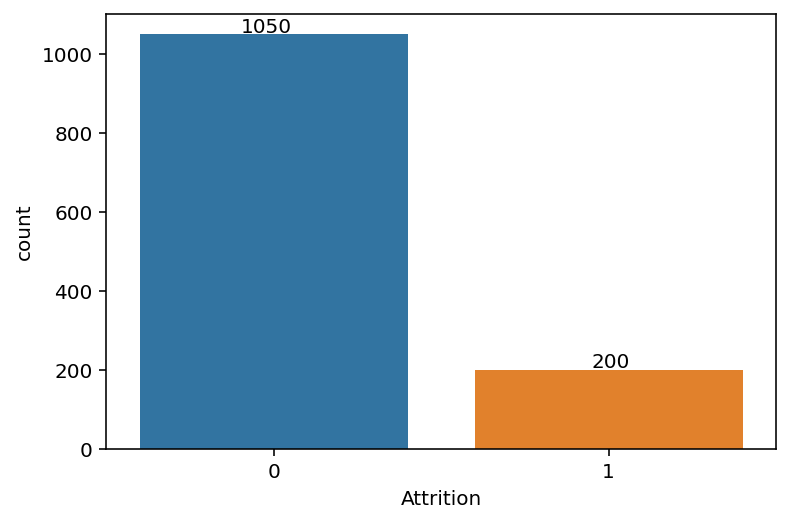

In [9]:
# Attrition 값 분포
cnt = data['Attrition'].value_counts()
data['Attrition'].value_counts()
sns.countplot(x='Attrition',data=data)
plt.text(-0.1,cnt.values[0]+5,cnt.values[0])
plt.text(0.95,cnt.values[1]+5,cnt.values[1])
plt.show()

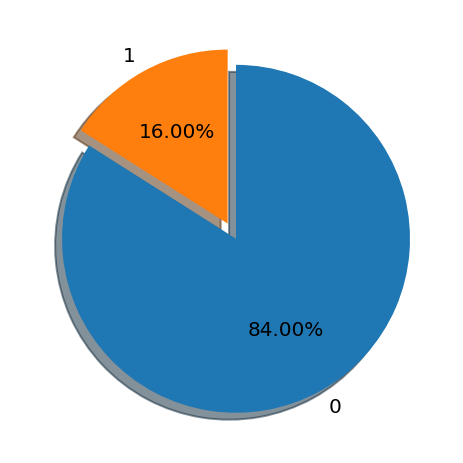

In [10]:
cnt = data['Attrition'].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.show()

- 이직하지 않은 직원들의 수가 이직한 직원들의 수의 5배 이상을 차지한다.
- 안정적인 회사의 이직율이 약 5~8%라고 하는데 16%로 이직율이 높은 편이다.

6-2) Attrition 값으로 구분해 Age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

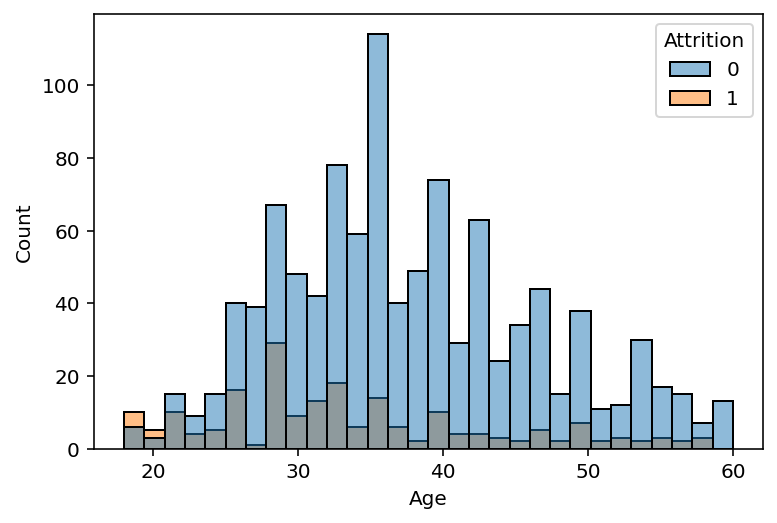

In [11]:
# Age --> Attrition 값 분포
sns.histplot(x=data['Age'], hue=data['Attrition'], bins=30)
plt.show()

- 20세 이하의 직원에서는 이직하지 않는 직원보다 이직하는 직원의 수가 더 많다.

6-3) Attrition 값으로 구분해 YearsAtCompany 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

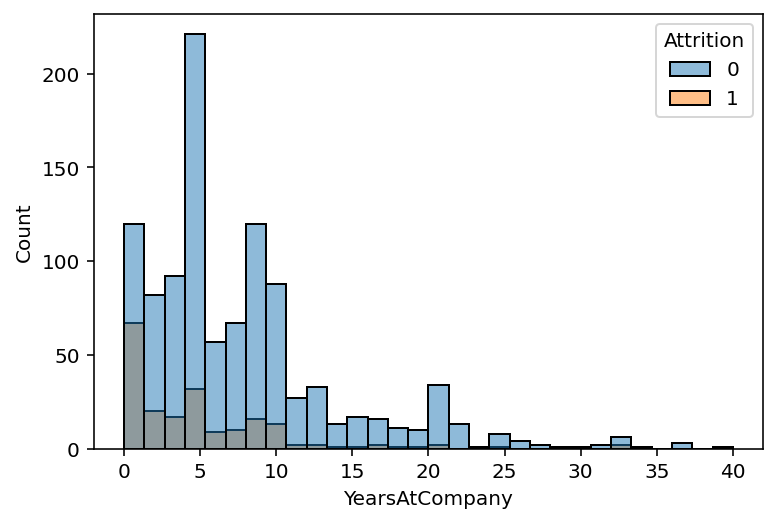

In [12]:
# YearsAtCompany --> Attrition 값 분포
sns.histplot(x=data['YearsAtCompany'], hue=data['Attrition'], bins=30)
plt.show()


- 현 직장에서의 근무연수가 낮은 신입직원들의 이직이 많이 일어난다.
- 현 직장에서의 근무연수가 10년이 넘는 직원들의 이직은 거의 일어나지 않는다.

6-4) Attrition으로 구분하여 Age 변수와 YearsAtCompany의 관계를 jointplot로 시각화해 확인.

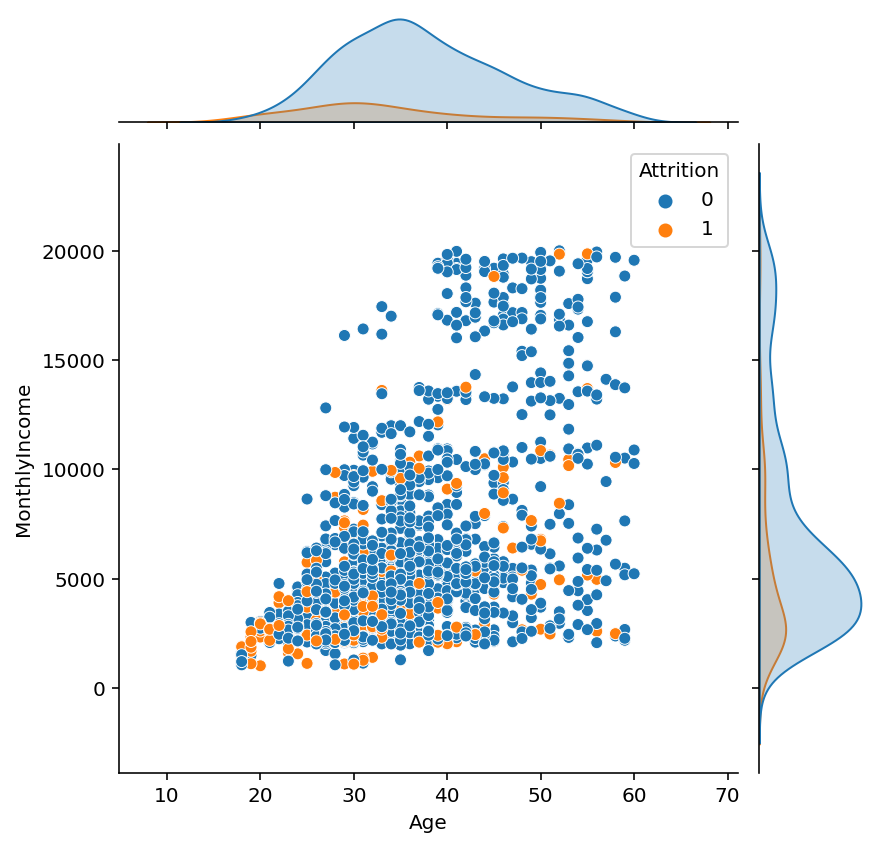

In [13]:
sns.jointplot(x='Age', y='MonthlyIncome',data=data,hue='Attrition')
plt.show()


6-4) Attrition으로 구분하여 TotalWorkingYears 변수와 MonthlyIncome 관계를 jointplot로 시각화해 확인.

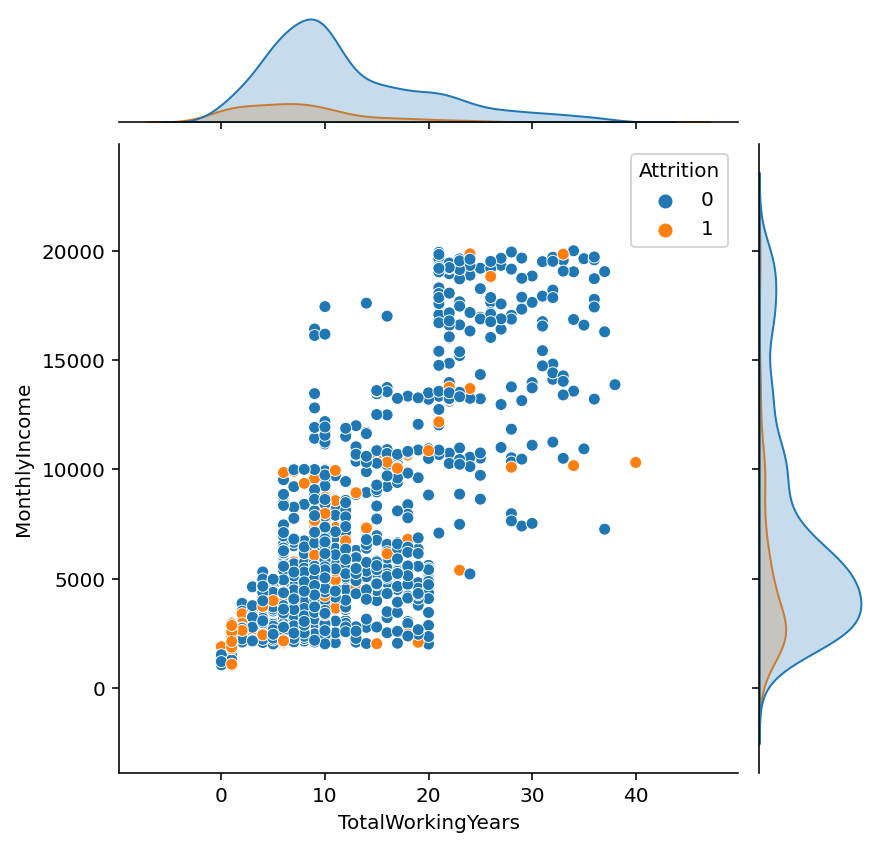

In [14]:
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome',data=data,hue='Attrition')
plt.show()


- 나이가 어리고 현 직장에서의 근무연수가 적은 입사한지 오래 되지 않은 직원들의 이직할 확률이 높은 것으로 볼 수 있다.
- 월급이 적고 총 경력 연수가 적은 입사한지 오래 되지 않은 직원들의 이직할 확률이 높은 것으로 볼 수 있다.
- 신입사원들이 이직하는 이유에 대해 조사해 볼 필요가 있다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 다음 두 변수의 결측치는 두 변수의 가장 빈번한 값으로 변경합니다.
    - DistanceFromHome, NumCompaniesWorked
- value_counts().idxmax()를 사용해 가장 빈도가 높은 변수 값을 얻을 수 있습니다.

In [15]:
# 결측치 처리
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

# 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

**2) x, y 분리**

- Attrition 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [16]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender
    - JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction
    - StockOptionLevel, WorkLifeBalance

In [17]:
# 가변수화
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
        'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
x = pd.get_dummies(x, columns=cols, drop_first=True)

# 확인
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,2.0,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


**4) 정규화**

- x의 다음 변수들을 정규화 합니다.
    - Age, DistanceFromHome, EmployeeNumber, MonthlyIncome,NumCompaniesWorked 
    - PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany 
    - YearsInCurrentRole, YearsWithCurrManager

In [18]:
# 정규화
cols=['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'NumCompaniesWorked', 
      'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsWithCurrManager']
x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())

# 확인
x.head()

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.357143,0.214286,0.394775,0.562507,0.000000,0.000000,0.350,0.500000,0.325,0.500000,...,0,0,0,1,0,0,0,0,0,1
1,0.404762,0.607143,0.682632,0.439863,0.222222,0.000000,0.250,0.333333,0.050,0.111111,...,0,0,1,0,0,0,0,0,1,0
2,0.571429,0.178571,0.924045,0.649763,1.000000,0.142857,0.450,0.500000,0.325,0.388889,...,0,1,0,0,1,0,0,0,0,1
3,0.666667,0.035714,0.582003,0.844602,0.888889,0.857143,0.700,0.333333,0.650,0.833333,...,0,0,0,0,0,0,0,0,1,0
4,0.500000,0.035714,0.876149,0.164192,0.222222,0.500000,0.175,1.000000,0.050,0.055556,...,0,0,0,1,1,0,0,0,1,0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [19]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링 1차

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1.모델링
- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [20]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [22]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [24]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[303  12]
 [ 51   9]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       315
           1       0.43      0.15      0.22        60

    accuracy                           0.83       375
   macro avg       0.64      0.56      0.56       375
weighted avg       0.79      0.83      0.80       375



### 4.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score={}
score['KNN'] = [precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]

## 4.2.Logistic Regression

### 4.2.1.모델링

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [26]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
# 2단계: 선언하기
model = LogisticRegression()

In [28]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [30]:
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[312   3]
 [ 38  22]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       315
           1       0.88      0.37      0.52        60

    accuracy                           0.89       375
   macro avg       0.89      0.68      0.73       375
weighted avg       0.89      0.89      0.87       375



### 4.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [31]:
score['Logistic Reg'] = [precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         accuracy_score(y_test, y_pred)]

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [32]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [33]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [34]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [35]:
# 예측하기
y_pred = model.predict(x_test)

In [36]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[314   1]
 [ 55   5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       315
           1       0.83      0.08      0.15        60

    accuracy                           0.85       375
   macro avg       0.84      0.54      0.53       375
weighted avg       0.85      0.85      0.80       375



### 4.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [37]:
score['Random Forest'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

[0.07113044 0.05708024 0.05948274 0.07801148 0.03851097 0.04392678
 0.05877558 0.02941004 0.05194533 0.03141869 0.03703179 0.01860714
 0.00930362 0.00831295 0.01074453 0.00737446 0.01210347 0.00798032
 0.00288257 0.00926188 0.00778481 0.01271188 0.00431795 0.00708347
 0.00873897 0.0091909  0.01118108 0.01280566 0.00786136 0.009416
 0.00549331 0.00220872 0.01225109 0.00159656 0.00490852 0.00126541
 0.00813146 0.00879871 0.01076907 0.00528083 0.01082994 0.01083369
 0.01197167 0.03489844 0.05627648 0.0068777  0.01067444 0.01032658
 0.01311303 0.00494154 0.00480704 0.00814971 0.01261706 0.00859191]


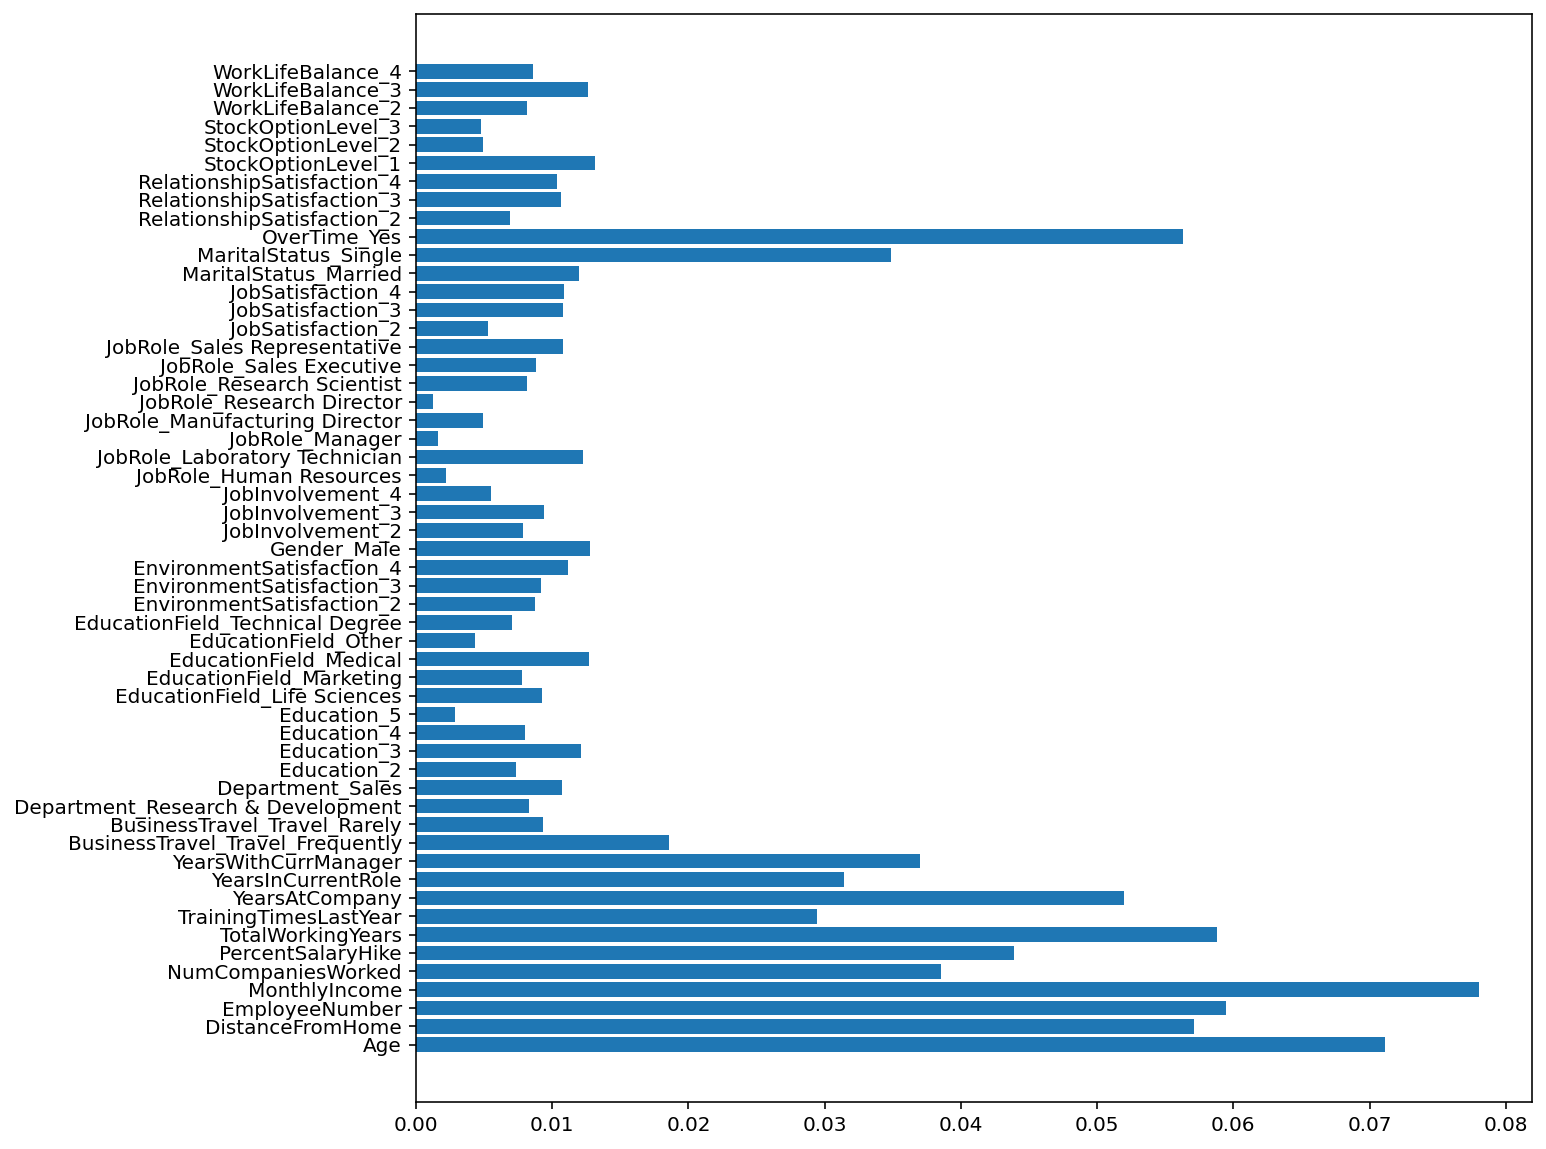

In [38]:
# 중요도 확인
print(model.feature_importances_)

# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [39]:
# 불러오기
from xgboost import XGBClassifier

In [40]:
# 선언하기
model = XGBClassifier(random_state=2022)

In [41]:
# 학습하기
model.fit(x_train, y_train)

[17:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# 예측하기
y_pred = model.predict(x_test)

In [43]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[308   7]
 [ 40  20]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       315
           1       0.74      0.33      0.46        60

    accuracy                           0.87       375
   macro avg       0.81      0.66      0.69       375
weighted avg       0.86      0.87      0.85       375



### 4.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [44]:
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

[0.02225077 0.01678491 0.01927628 0.02543901 0.02278681 0.01323391
 0.02321061 0.00963554 0.02022312 0.02174074 0.01591646 0.02288753
 0.01339709 0.04056259 0.01523685 0.04079437 0.01013498 0.01600412
 0.         0.0131663  0.02868857 0.01942833 0.         0.02981384
 0.00934072 0.01656269 0.01583881 0.02628557 0.00404489 0.01051978
 0.00704965 0.         0.00985623 0.         0.00117732 0.
 0.02988319 0.03754088 0.02591858 0.02620518 0.00938625 0.01602888
 0.01938076 0.033186   0.05097415 0.0145359  0.01374632 0.01461531
 0.01621622 0.01529709 0.04922329 0.02268939 0.01917084 0.02471345]


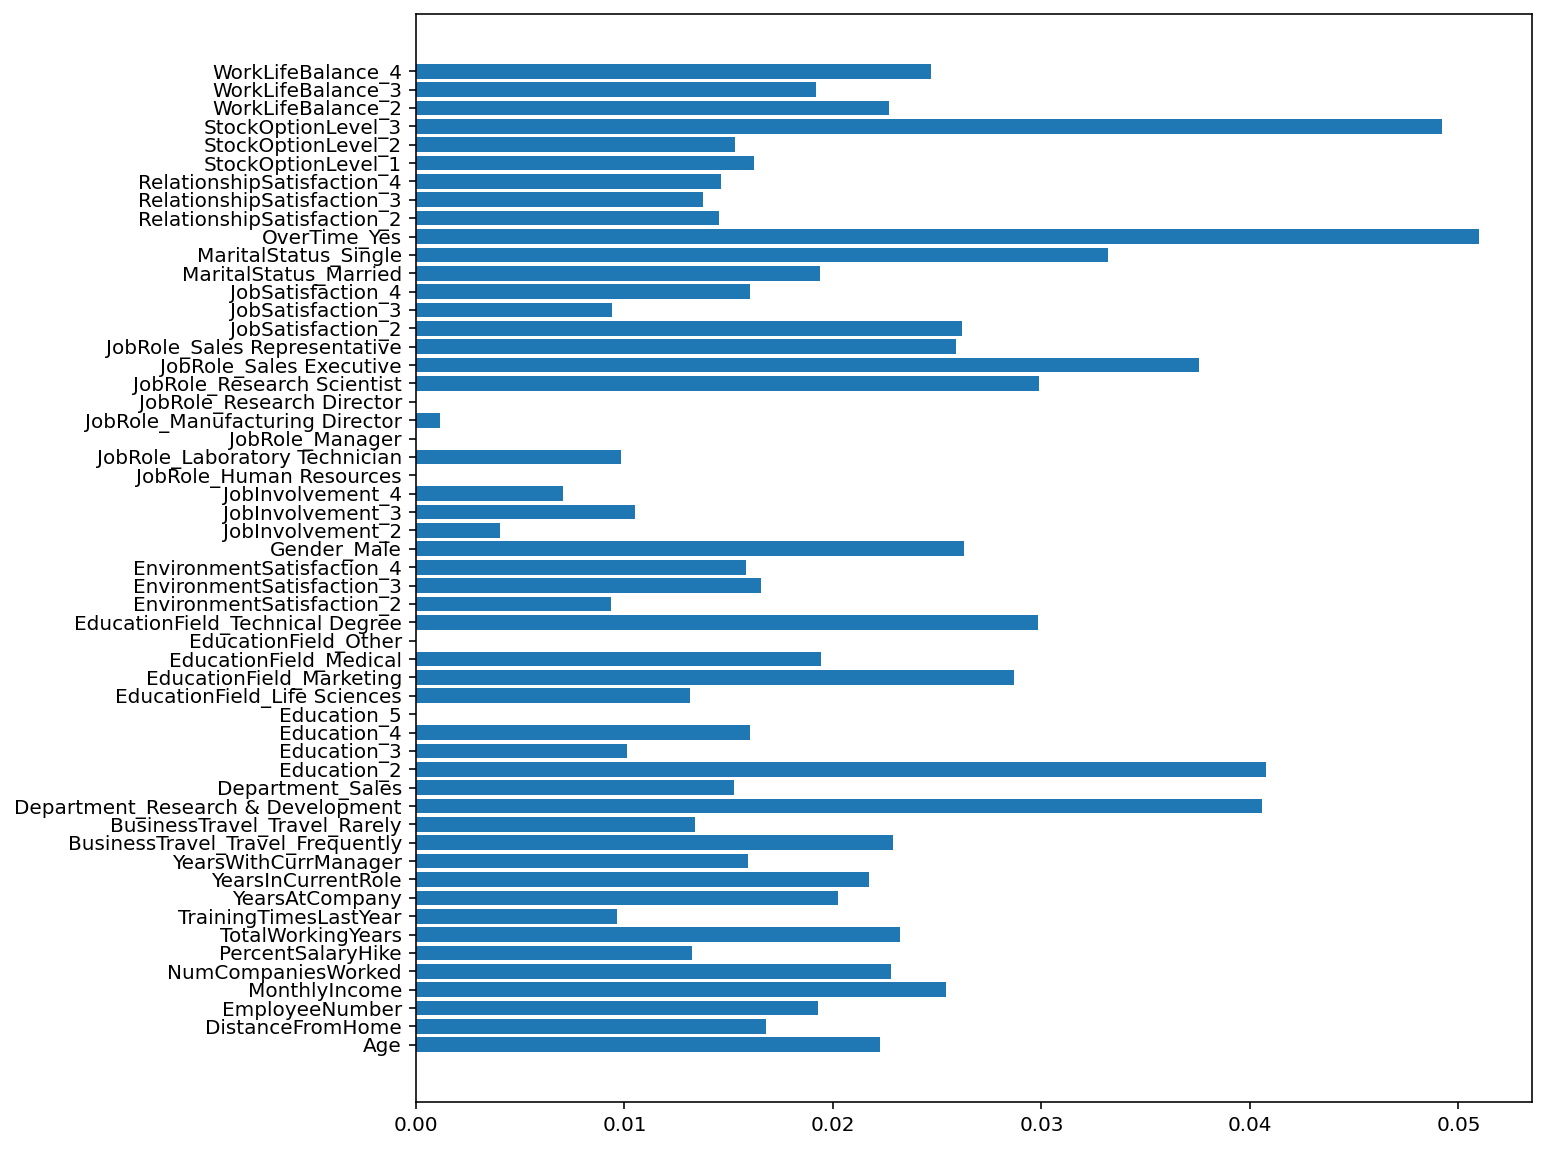

In [45]:
# 중요도 확인
print(model.feature_importances_)

# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

# 5.정리 #1

- 모델 성능에서 특이한 점을 발견했나요?
- accuracy, precision이 높은 이유는 무엇일까요?
- recall이 낮은 이유는 무엇일까요?

> 모델 성능에서 특이한 점을 발견했나요?  
>   * 이직한 직원들의 대한 recall이 다른 수치들에 비해 현격히 작음

> accuracy, precision이 높은 이유는 무엇일까요?
>   * 표본 수가 많은 이직하지 않은 직원들에 대한 정확도와 예측이 이직한 직원들에 비해 충분히 많기 때문이다.

> recall이 낮은 이유는 무엇일까요?
>   * 이직한 직원들이 이직하지 않은 직원들에 비해 표본 수가 적기 때문에 이직한 직원들을 이직할 것이라고 예측하기 어려움
>   * 이직한 직원들의 학습용 데이터가 적어 충분히 학습하지 못하였기 때문이다.

# 6. Over/Under Sampling

- 불균형 데이터(Imbalanced Data)를 맞추기 위해 Over 또는 Under Sampling을 수행할 수 있습니다.
- imblearn 라이브러리를 사용합니다.

In [46]:
# imbalanced-learn 라이브러리 설치
# !pip install imblearn

- 원래 Target 값 분포를 우선 확인합니다.

In [47]:
# Target 값 분포 확인
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

- 본 실습에서는 Over Sampling으로 작업합니다.

In [48]:
# Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

- Over Sampling 된 y_over 분포를 확인하면 0과 1 값의 비율이 같음을 알 수 있습니다.

In [49]:
# Target 값 분포 확인
y_over.value_counts()

0    1050
1    1050
Name: Attrition, dtype: int64

- 참고: Under Sampling 방법은 아래와 같으며, 본 실습에서 사용하지 않으니 주석처리합니다.

In [50]:
# Unser Sampling
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=2022)
# x_under, y_under = cc.fit_resample(x, y)

- 새로 Sampling 된 데이터(x_over, y_over)로 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [51]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  

# 7.모델링 #2

- 위에서 만든 모델을 그때와 동일한 옵션으로 다시 모델링합니다.

## 7.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [52]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [54]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
# 예측하기
y_pred = model.predict(x_test)

In [56]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[199 106]
 [  4 321]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       305
           1       0.75      0.99      0.85       325

    accuracy                           0.83       630
   macro avg       0.87      0.82      0.82       630
weighted avg       0.86      0.83      0.82       630



### 7.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [57]:
score['KNN_2'] = [precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  accuracy_score(y_test, y_pred)]

## 7.2.Logistic Regression

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [58]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [59]:
# 2단계: 선언하기
model = LogisticRegression()

In [60]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [62]:
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[288  17]
 [ 56 269]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       305
           1       0.94      0.83      0.88       325

    accuracy                           0.88       630
   macro avg       0.89      0.89      0.88       630
weighted avg       0.89      0.88      0.88       630



### 7.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [63]:
score['Logistic Reg_2'] = [precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           accuracy_score(y_test, y_pred)]

## 7.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [64]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [65]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [66]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [67]:
# 예측하기
y_pred = model.predict(x_test)

In [68]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[291  14]
 [ 43 282]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       305
           1       0.95      0.87      0.91       325

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



### 7.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [69]:
score['Random Forest_2'] = [precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            accuracy_score(y_test, y_pred)]

[0.0516159  0.06167916 0.04549798 0.0533554  0.04013623 0.03557858
 0.05231101 0.04561111 0.05492505 0.05337714 0.0606131  0.00651821
 0.00948648 0.01018237 0.0071313  0.00642788 0.00713654 0.00944284
 0.00266918 0.00810956 0.00331489 0.0137951  0.0027977  0.0038639
 0.00968843 0.01395031 0.01574026 0.00829945 0.00649762 0.01465257
 0.00788316 0.00140239 0.00592252 0.00241494 0.009847   0.00447367
 0.00730885 0.00468015 0.00302303 0.00902099 0.01396041 0.03077771
 0.01346366 0.0141347  0.02283055 0.0092016  0.01123263 0.01329475
 0.05963171 0.01607031 0.00317736 0.00744558 0.00993263 0.00446443]


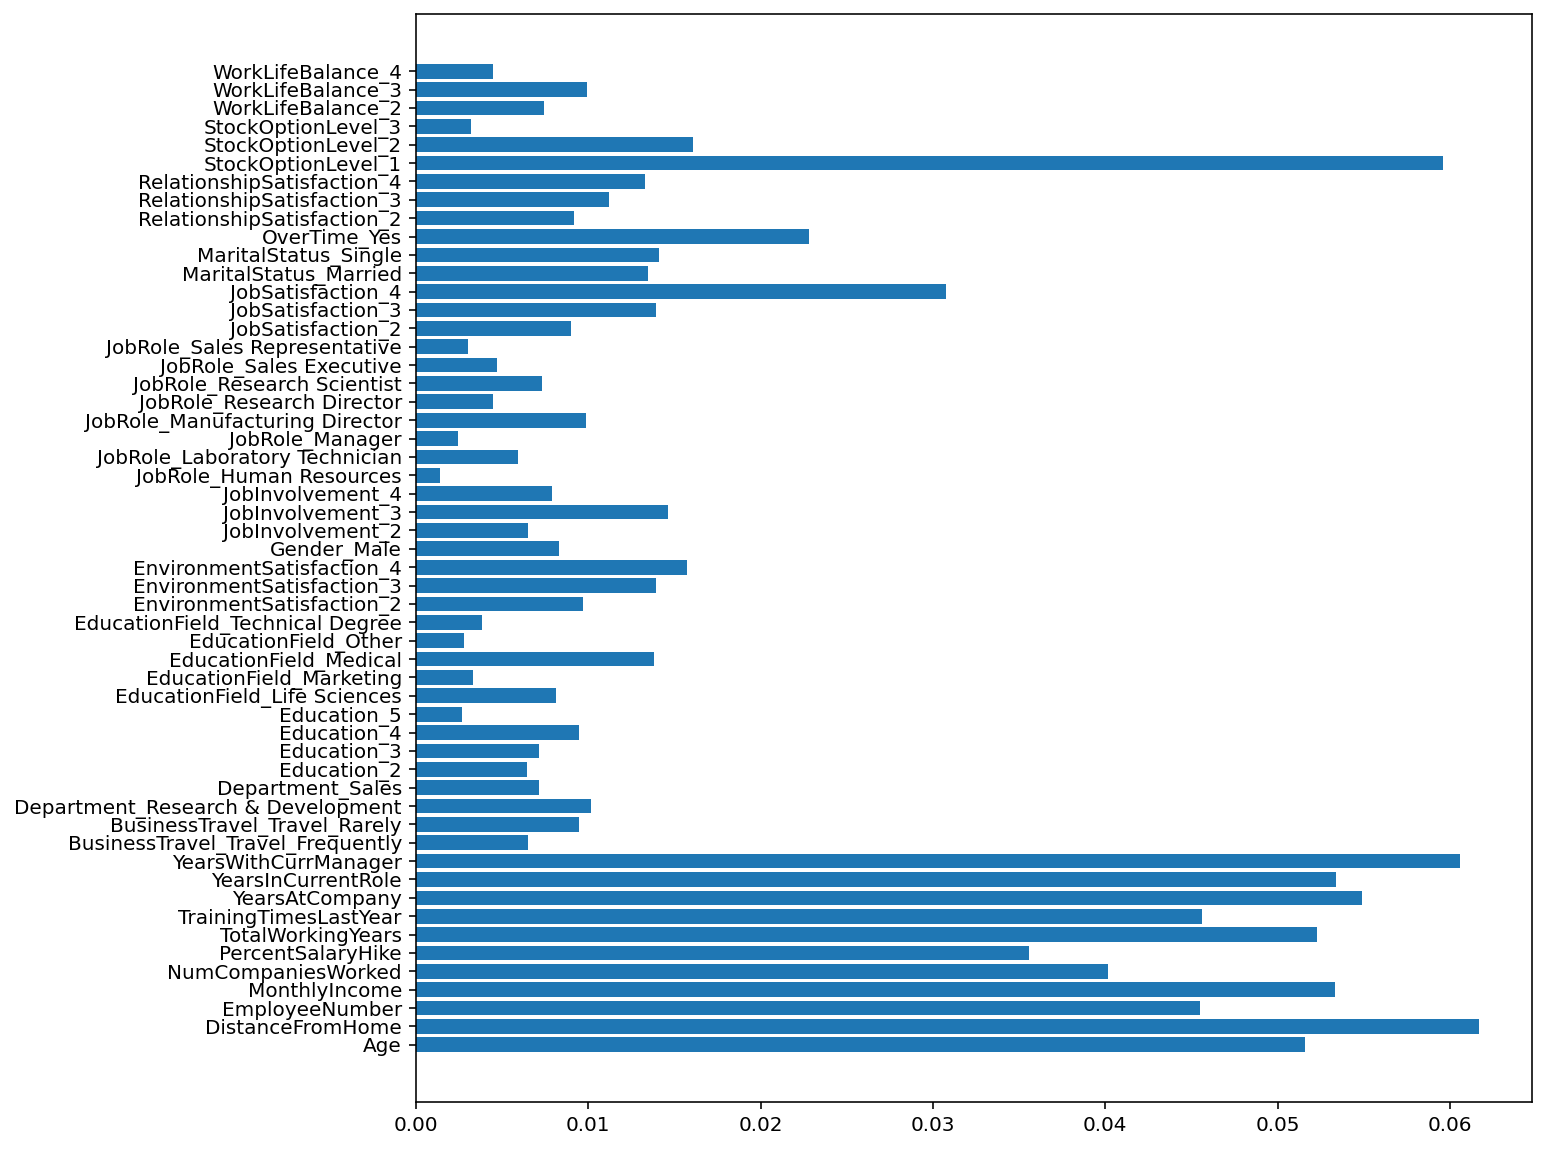

In [70]:
# 중요도 확인
print(model.feature_importances_)

# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

## 7.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [71]:
# 불러오기
from xgboost import XGBClassifier

In [72]:
# 선언하기
model = XGBClassifier(random_state=2022)

In [73]:
# 학습하기
model.fit(x_train, y_train)

[17:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
# 예측하기
y_pred = model.predict(x_test)

In [75]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[284  21]
 [ 33 292]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       305
           1       0.93      0.90      0.92       325

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



### 7.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [76]:
score['XGBoost_2'] = [precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

[0.00961236 0.01459152 0.00778137 0.01005446 0.01058861 0.00783002
 0.00998577 0.02142215 0.00703919 0.02324481 0.01619689 0.00859475
 0.01733115 0.0094767  0.01154439 0.00977698 0.00676724 0.01181605
 0.         0.00587611 0.00645516 0.00991674 0.0149558  0.
 0.02989652 0.01652237 0.02119602 0.00979069 0.0251378  0.01591097
 0.03334415 0.         0.01592821 0.00821674 0.07965383 0.02735097
 0.0130541  0.01142379 0.05738547 0.03897081 0.02359725 0.03372546
 0.00770612 0.00473787 0.01954629 0.01648366 0.02314148 0.01670886
 0.06596371 0.08193143 0.01699257 0.0130459  0.01258477 0.00919401]


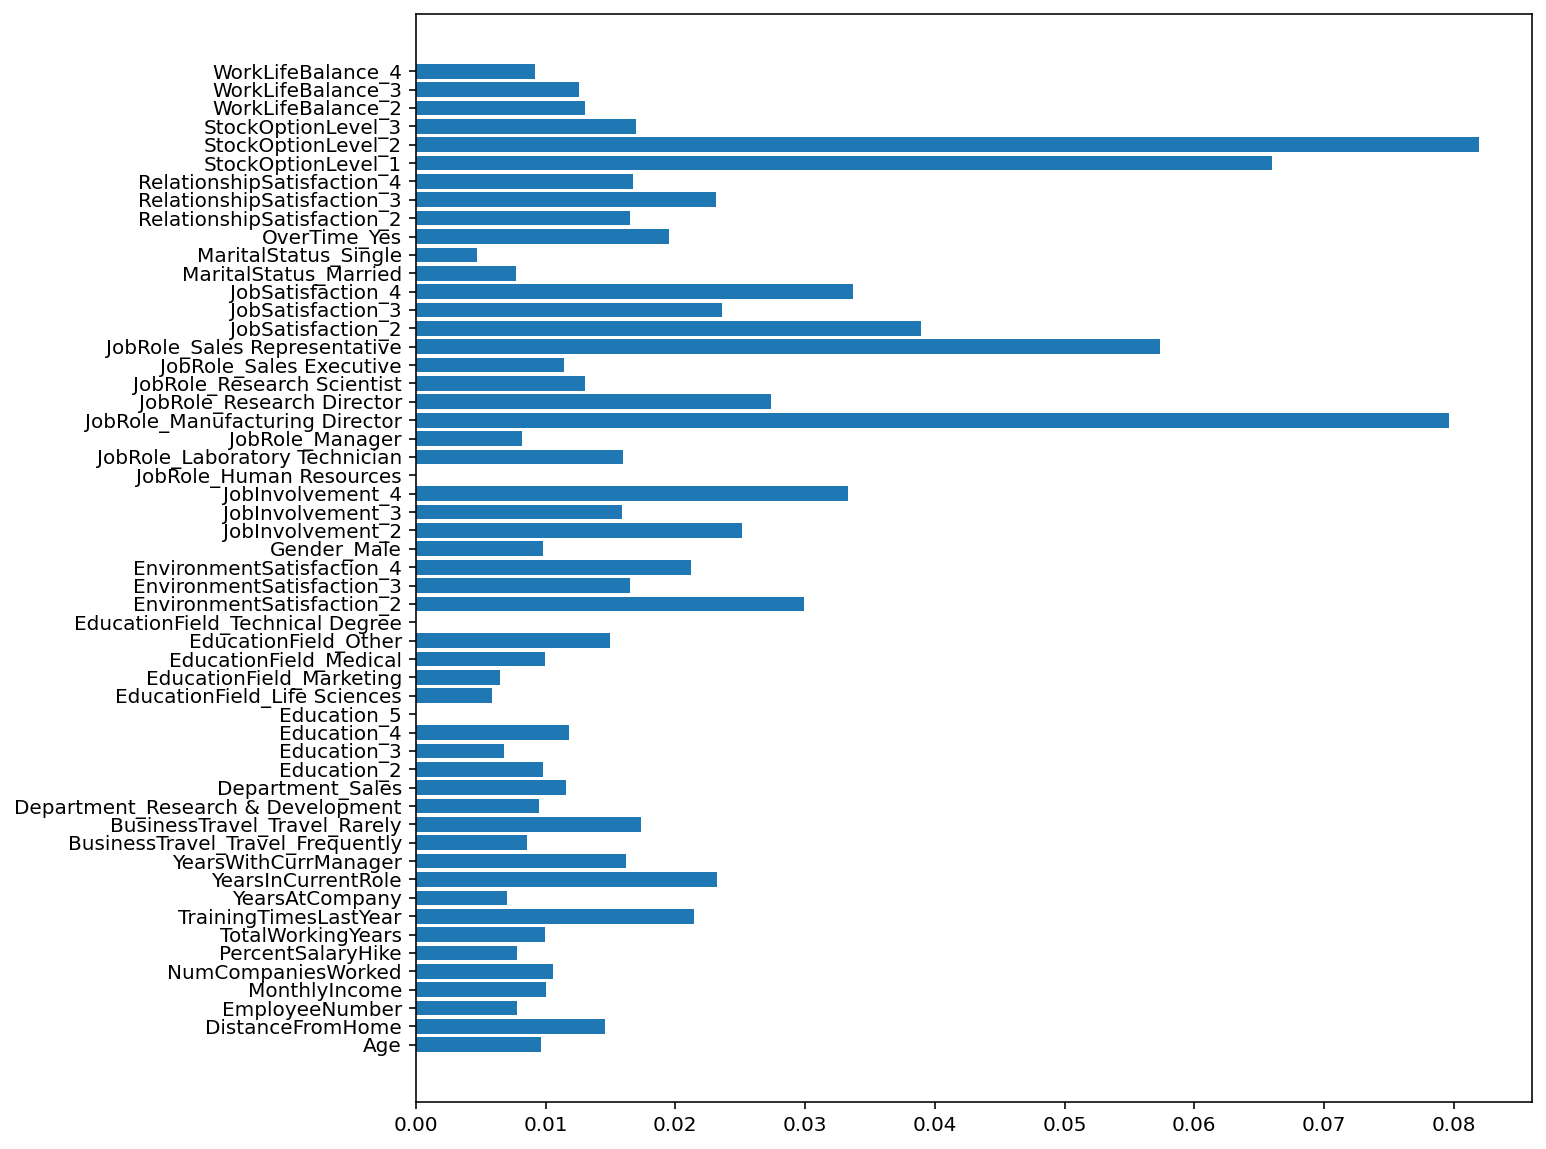

In [77]:
# 중요도 확인
print(model.feature_importances_)

# 중요도 시각화
plt.figure(figsize=(10,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

# 8.정리 #2

## 8.1.성능 비교

- Over Sampling 전후 성능을 비교합니다.

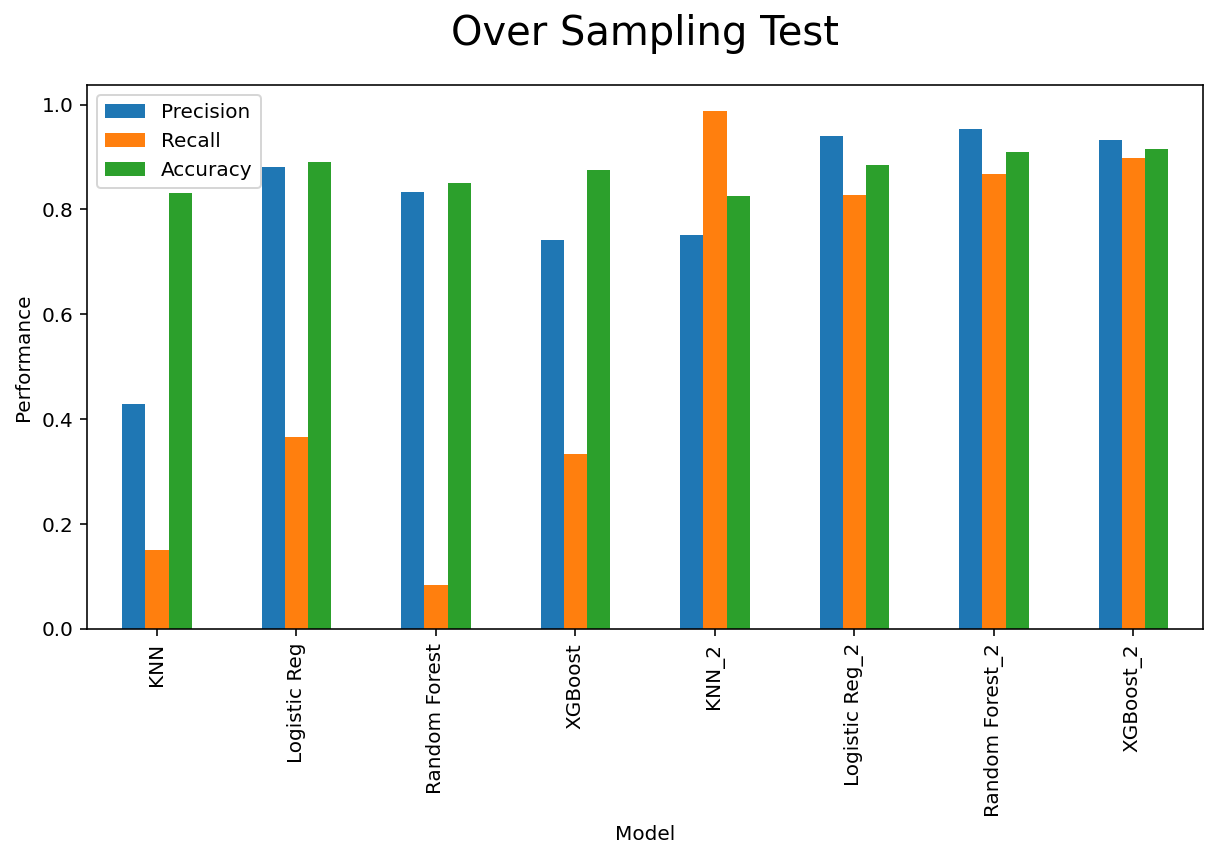

In [78]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

## 8.2.정리

- 불균형 데이터에 대해 이해 했나요?
- Ovder Sampling, Under Sampling 개념을 이해 했나요?
- Ovder Sampling 또는 Under Sampling 수행 후 모델의 성능이 달라졌나요?
- 모델의 성능을 높이기 위해 어떤 것들을 할 수 있을까요?

> 불균형 데이터에 대해 이해 했나요?
    > * 범주형 데이터의 수를 비교하여 한 쪽이 다른 한 쪽에 비해 현격히 차이가 클 때 발생하는 데이터
    
> Over Sampling, Under Sampling 개념을 이해 했나요?
    > * Over Sampling은 낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형을 해소하는 방법이고, Under Sampling은 불균형한 데이터 셋에서 높은 비율을 차지하던 클래스의 데이터 수를 줄임으로써 데이터 불균형을 해소하는 방법이다.
    
> Over Sampling 또는 Under Sampling 수행 후 모델의 성능이 달라졌나요?
    > * Over Samling 하여 이직한 직원에 대한 데이터를 늘려 분석했기 때문에 이직한 직원들에 대한 Recall이 증가하였다.

> 모델의 성능을 높이기 위해 어떤 것들을 할 수 있을까요?
    > * 적절한 튜닝 모델을 선정하고 최적의 파라미터를 찾아 튜닝하여 모델의 성능을 높일 수 있다.

## 9. 튜닝

In [81]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 선언
rand_param = {'max_depth' : range(1, 51)}

# 선언하기
model_dst = RandomForestClassifier(random_state=2022)

model = RandomizedSearchCV(model_dst,   # 기본 모델
                          rand_param,   # 파라미터 변수
                          cv=10,        # cv 값(K-Fold Cross Validation의 분할 수)
                          n_jobs=-1) # 성능 기준
# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[293  12]
 [ 42 283]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       305
           1       0.96      0.87      0.91       325

    accuracy                           0.91       630
   macro avg       0.92      0.92      0.91       630
weighted avg       0.92      0.91      0.91       630



{'max_depth': 19} 0.9312925170068027


<BarContainer object of 54 artists>

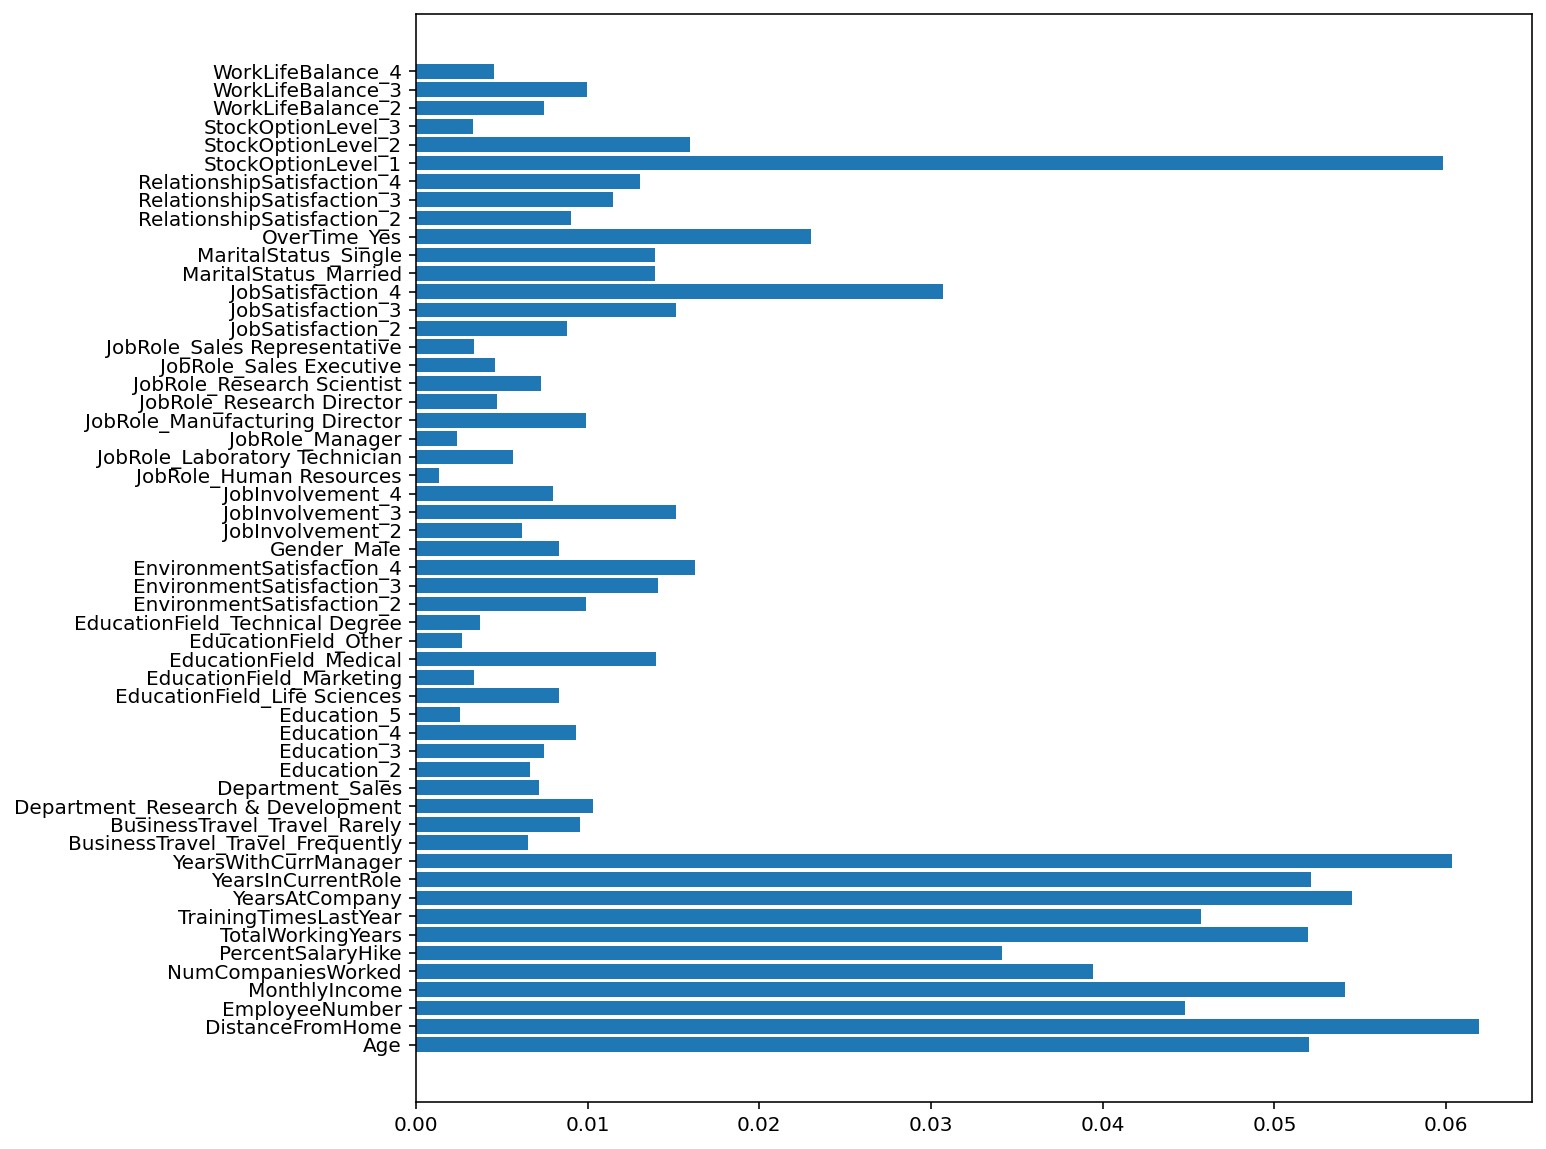

In [84]:
print(model.best_params_, model.best_score_)
plt.figure(figsize=(10,10))
plt.barh(list(x), model.best_estimator_.feature_importances_)